## Rendering: Vector Space Models

### Graphics

1. Evaluating effectiveness across languages and overal effectiveness.
 - Histogram comparison of accuracy scores for the 6 methods employed in English and Spanish.
2. Evaluating effectiveness for Self-Study:
 - Histogram comparison for pass/fail scores.
3. Deciding hypothesis on multiple model answers:
 - Histogram comparison for MA=3 scores.

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import libs.data as data
import libs.utils as utils
import libs.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from importlib import reload
%matplotlib inline
import seaborn as sns

In [2]:
df = data.load_dataframe('../../../datasets/final/en/asag_v2_en_filter.csv')
df.head(1)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

### Knowledge Based Methods for Comparison

In [3]:
pass_fail_scores = df['Class2_Score'].as_matrix()
true_scores = np.round(df['Score'].as_matrix())

e1_shortest_path_res = data.load('../tmp/e1_exp_01')
e2_lch_res = data.load('../tmp/e2_exp_01')
e3_wp_res = data.load('../tmp/e3_exp_01')
e4_resnik_res = data.load('../tmp/e4_exp_01')
e5_jch_res = data.load('../tmp/e5_exp_01')
e6_lin_res = data.load('../tmp/e6_exp_01')

# Gather statistics from runs
e1_stats = stats.get_all_stats(true_scores, e1_shortest_path_res['y_pred'])
e1_stats['name'] = 'SP'
e1_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e1_shortest_path_res['y_pred']))
e1_stats_pf['name'] = 'SP'

e2_stats = stats.get_all_stats(true_scores, e2_lch_res['y_pred'])
e2_stats['name'] = 'LCH'
e2_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e2_lch_res['y_pred']))
e2_stats_pf['name'] = 'LCH'

e3_stats = stats.get_all_stats(true_scores, e3_wp_res['y_pred'])
e3_stats['name'] = 'WP'
e3_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e3_wp_res['y_pred']))
e3_stats_pf['name'] = 'WP'

e4_stats = stats.get_all_stats(true_scores, e4_resnik_res['y_pred'])
e4_stats['name'] = 'RES'
e4_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e4_resnik_res['y_pred']))
e4_stats_pf['name'] = 'RES'

e5_stats = stats.get_all_stats(true_scores, e5_jch_res['y_pred'])
e5_stats['name'] = 'JCH'
e5_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e5_jch_res['y_pred']))
e5_stats_pf['name'] = 'JCH'

e6_stats = stats.get_all_stats(true_scores, e6_lin_res['y_pred'])
e6_stats['name'] = 'LIN'
e6_stats_pf = stats.get_all_stats(pass_fail_scores, utils.convert_to_pass_fail(e6_lin_res['y_pred']))
e6_stats_pf['name'] = 'LIN'

df_columns = ['Name', 'Accuracy', 'Precision', 'Recall', 'F1', 'Kappa', 'MAE', 'R']
df_class6_kb_data = [
    [e1_stats['name']] + e1_stats['apcf'] + [e1_stats['k'], e1_stats['mae'], e1_stats['r']],
    [e2_stats['name']] + e2_stats['apcf'] + [e2_stats['k'], e2_stats['mae'], e2_stats['r']],
    [e3_stats['name']] + e3_stats['apcf'] + [e3_stats['k'], e3_stats['mae'], e3_stats['r']],
    [e4_stats['name']] + e4_stats['apcf'] + [e4_stats['k'], e4_stats['mae'], e4_stats['r']],
    [e5_stats['name']] + e5_stats['apcf'] + [e5_stats['k'], e5_stats['mae'], e5_stats['r']],
    [e6_stats['name']] + e6_stats['apcf'] + [e6_stats['k'], e6_stats['mae'], e6_stats['r']],
]

df_class6_kb = pd.DataFrame(df_class6_kb_data, columns=df_columns)
df_class6_kb.to_csv('../tmp/vsm_renderings/kb_class6.csv', sep='~')

df_class2_kb_data = [
    [e1_stats_pf['name']] + e1_stats_pf['apcf'] + [e1_stats_pf['k'], e1_stats_pf['mae'], e1_stats_pf['r']],
    [e2_stats_pf['name']] + e2_stats_pf['apcf'] + [e2_stats_pf['k'], e2_stats_pf['mae'], e2_stats_pf['r']],
    [e3_stats_pf['name']] + e3_stats_pf['apcf'] + [e3_stats_pf['k'], e3_stats_pf['mae'], e3_stats_pf['r']],
    [e4_stats_pf['name']] + e4_stats_pf['apcf'] + [e4_stats_pf['k'], e4_stats_pf['mae'], e4_stats_pf['r']],
    [e5_stats_pf['name']] + e5_stats_pf['apcf'] + [e5_stats_pf['k'], e5_stats_pf['mae'], e5_stats_pf['r']],
    [e6_stats_pf['name']] + e6_stats_pf['apcf'] + [e6_stats_pf['k'], e6_stats_pf['mae'], e6_stats_pf['r']],
]

df_class2_kb = pd.DataFrame(df_class2_kb_data, columns=df_columns)
df_class2_kb.to_csv('../tmp/vsm_renderings/kb_class2.csv', sep='~')

In [11]:
display(df_class2_kb)

Name  Accuracy  Precision    Recall        F1     Kappa       MAE         R
0   SP  0.566667   0.722921  0.566667  0.597895  0.159264  0.292040  0.193284
1  LCH  0.635323   0.672853  0.635323  0.650948  0.092805  0.076119  0.094515
2   WP  0.727363   0.690464  0.727363  0.702864  0.132891 -0.090547  0.138770
3  RES  0.604478   0.690481  0.604478  0.631866  0.124262  0.170647  0.134211
4  JCH  0.553731   0.733630  0.553731  0.583803  0.164667  0.327861  0.208560
5  LIN  0.616418   0.681176  0.616418  0.639772  0.108387  0.129851  0.113690

### Collect VSM Results

In [4]:
# N-Grams and FastText vs. Word2Vec Model comparisons
w2v_en_n1 = data.load('../tmp/vsm/vsm_e1_word2vec_en_n1')
w2v_en_n2 = data.load('../tmp/vsm/vsm_e1_word2vec_en_n2')
w2v_en_n3 = data.load('../tmp/vsm/vsm_e1_word2vec_en_n3')

w2v_en_n1_stats = stats.get_all_stats(true_scores, w2v_en_n1['y_pred'])
w2v_en_n1_stats['name'] = 'w2v_n1'
w2v_en_n2_stats = stats.get_all_stats(true_scores, w2v_en_n2['y_pred'])
w2v_en_n2_stats['name'] = 'w2v_n2'
w2v_en_n3_stats = stats.get_all_stats(true_scores, w2v_en_n3['y_pred'])
w2v_en_n3_stats['name'] = 'w2v_n3'

ft_en_n1 = data.load('../tmp/vsm/vsm_e2_fastText_en_n1')
ft_en_n2 = data.load('../tmp/vsm/vsm_e2_fastText_en_n2')
ft_en_n3 = data.load('../tmp/vsm/vsm_e2_fastText_en_n3')

ft_en_n1_stats = stats.get_all_stats(true_scores, ft_en_n1['y_pred'])
ft_en_n1_stats['name'] = 'ft_n1'
ft_en_n2_stats = stats.get_all_stats(true_scores, ft_en_n2['y_pred'])
ft_en_n2_stats['name'] = 'ft_n2'
ft_en_n3_stats = stats.get_all_stats(true_scores, ft_en_n3['y_pred'])
ft_en_n3_stats['name'] = 'ft_n3'

# Model Answers

w2v_en_n3_ma2 = data.load('../tmp/vsm/vsm_e1_word2vec_en_n3_ma2')
w2v_en_n3_ma3 = data.load('../tmp/vsm/vsm_e1_word2vec_en_n3_ma3')

w2v_en_n3_ma2_stats = stats.get_all_stats(true_scores, w2v_en_n3_ma2['y_pred'])
w2v_en_n3_ma2_stats['name'] = 'w2v_n3_ma2'
w2v_en_n3_ma3_stats = stats.get_all_stats(true_scores, w2v_en_n3_ma3['y_pred'])
w2v_en_n3_ma3_stats['name'] = 'w2v_n3_ma3'


ft_en_n3_ma2 = data.load('../tmp/vsm/vsm_e2_fastText_en_n3_ma2')
ft_en_n3_ma3 = data.load('../tmp/vsm/vsm_e2_fastText_en_n3_ma3')

ft_en_n3_ma2_stats = stats.get_all_stats(true_scores, ft_en_n3_ma2['y_pred'])
ft_en_n3_ma2_stats['name'] = 'ft_n3_ma2'
ft_en_n3_ma3_stats = stats.get_all_stats(true_scores, ft_en_n3_ma3['y_pred'])
ft_en_n3_ma3_stats['name'] = 'ft_n3_ma3'

# Length Penalization
w2v_en_n3_ma1_length_penalize = data.load('../tmp/vsm/vsm_e1_word2vec_en_n3_ma1_length_penalize')
ft_en_n3_ma1_length_penalize = data.load('../tmp/vsm/vsm_e2_fastText_en_n3_ma1_length_penalize')

w2v_en_n3_ma1_length_penalize_stats = stats.get_all_stats(true_scores, w2v_en_n3_ma1_length_penalize['y_pred'])
w2v_en_n3_ma1_length_penalize_stats['name'] = 'w2v_en_n3_ma1_LP'
ft_en_n3_ma1_length_penalize_stats = stats.get_all_stats(true_scores, ft_en_n3_ma1_length_penalize['y_pred'])
ft_en_n3_ma1_length_penalize_stats['name'] = 'ft_en_n3_ma1_LP'

# WMS, Cosine Similarity
wms_ma1  = data.load('../tmp/vsm/vsm_e3_wmsimilarity_ma1')
wmd_corr = data.load('../tmp/vsm/vsm_e3_wmd_corr')
cos_ma1  = data.load('../tmp/vsm/vsm_e3_cosine_similarity_ma1')

wms_ma1_stats = stats.get_all_stats(true_scores, wms_ma1['y_pred'])
wms_ma1_stats['name'] = 'wms_ma1'
cos_ma1_stats = stats.get_all_stats(true_scores, cos_ma1['y_pred'])
cos_ma1_stats['name'] = 'cos_ma1'

# Correlation Coefficients
correlations = [
    # N-Gram Size
    w2v_en_n1['y_pred'], w2v_en_n2['y_pred'], w2v_en_n3['y_pred'],
    ft_en_n1['y_pred'], ft_en_n2['y_pred'], ft_en_n3['y_pred'],
    
    # Model Answer Count
    w2v_en_n3_ma2['y_pred'], w2v_en_n3_ma3['y_pred'],
    ft_en_n3_ma2['y_pred'], ft_en_n3_ma3['y_pred'],
    
    # Length-Penalization
    w2v_en_n3_ma1_length_penalize['y_pred'],
    ft_en_n3_ma1_length_penalize['y_pred'],
    
    # Distance Measures
    wms_ma1['y_pred'],
    cos_ma1['y_pred'],
    wmd_corr['y_pred']
]

corrs_cols = [
    'w2v_en_n1', 'w2v_en_n2', 'w2v_en_n3',
    'ft_en_n1', 'ft_en_n2', 'ft_en_n3',
    'w2v_en_n3_ma2', 'w2v_en_n3_ma3',
    'ft_en_n3_ma2', 'ft_en_n3_ma3',
    'w2v_en_n3_ma1_LP', 'ft_en_n3_ma1_LP',
    'wms_ma1', 'cos_ma1', 'wmd'
]
corrs_df = pd.DataFrame(np.array(correlations).T, columns=corrs_cols)
display(corrs_df[['w2v_en_n3', 'ft_en_n3', 'w2v_en_n3_ma3', 'ft_en_n3_ma3', 'wms_ma1', 'cos_ma1']].corr())

vsm_results = [
    # N-Gram Size
    w2v_en_n1_stats, w2v_en_n2_stats, w2v_en_n3_stats,
    ft_en_n1_stats, ft_en_n2_stats, ft_en_n3_stats,
    
    # Model Answer Count
    w2v_en_n3_ma2_stats, w2v_en_n3_ma3_stats,
    ft_en_n3_ma2_stats, ft_en_n3_ma3_stats,
    
    # Length-Penalization
    w2v_en_n3_ma1_length_penalize_stats,
    ft_en_n3_ma1_length_penalize_stats,
    
    # Distance Measures
    wms_ma1_stats,
    cos_ma1_stats
]

df_vsm_class6_d = []
for x in vsm_results:
    row = [x['name']] + x['apcf'] + [x['k'], x['mae'], x['r']]
    df_vsm_class6_d.append(row)

df_vsm_class6 = pd.DataFrame(df_vsm_class6_d, columns=df_columns)
display(df_vsm_class6)

/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


w2v_en_n3  ft_en_n3  w2v_en_n3_ma3  ft_en_n3_ma3   wms_ma1  \
w2v_en_n3       1.000000  0.827518       0.796759      0.734918  0.543047   
ft_en_n3        0.827518  1.000000       0.738781      0.804039  0.574395   
w2v_en_n3_ma3   0.796759  0.738781       1.000000      0.834284  0.462422   
ft_en_n3_ma3    0.734918  0.804039       0.834284      1.000000  0.515771   
wms_ma1         0.543047  0.574395       0.462422      0.515771  1.000000   
cos_ma1         0.572567  0.619164       0.507101      0.541636  0.566422   

                cos_ma1  
w2v_en_n3      0.572567  
ft_en_n3       0.619164  
w2v_en_n3_ma3  0.507101  
ft_en_n3_ma3   0.541636  
wms_ma1        0.566422  
cos_ma1        1.000000

Name  Accuracy  Precision    Recall        F1     Kappa  \
0             w2v_n1  0.186070   0.489222  0.186070  0.202062  0.027332   
1             w2v_n2  0.206468   0.503422  0.206468  0.219104  0.035936   
2             w2v_n3  0.221891   0.514289  0.221891  0.229111  0.040083   
3              ft_n1  0.261194   0.529352  0.261194  0.280458  0.062017   
4              ft_n2  0.295522   0.545421  0.295522  0.293896  0.070942   
5              ft_n3  0.330348   0.552875  0.330348  0.316271  0.082195   
6         w2v_n3_ma2  0.281592   0.546513  0.281592  0.291484  0.070688   
7         w2v_n3_ma3  0.329353   0.560359  0.329353  0.340098  0.106165   
8          ft_n3_ma2  0.406468   0.577410  0.406468  0.387445  0.145141   
9          ft_n3_ma3  0.441294   0.585725  0.441294  0.423806  0.177668   
10  w2v_en_n3_ma1_LP  0.121393   0.461050  0.121393  0.113923  0.015911   
11   ft_en_n3_ma1_LP  0.190547   0.525180  0.190547  0.194889  0.042758   
12           wms_ma1  0.385572   0.545208  0.385572  0.311793  0.077699   
13           cos_ma1  0.421891   0.454640  0.421891  0.406498  0.114724   

         MAE         R  
0   1.166169  0.429038  
1   0.972637  0.436641  
2   0.859204  0.432981  
3   0.671144  0.428681  
4   0.493035  0.446710  
5   0.391542  0.433692  
6   0.605970  0.474965  
7   0.480597  0.480458  
8   0.211940  0.437115  
9   0.127363  0.458297  
10  1.772139  0.161546  
11  1.423383  0.098716  
12  0.069652  0.262033  
13 -0.057711  0.275838

In [25]:
# Show for pass/fail
pf_true_scores = df['Class2_Score']
w2v_en_n3_pf = stats.get_all_stats(pf_true_scores, utils.convert_to_pass_fail(w2v_en_n3['y_pred']))
w2v_en_n3_pf['name'] = 'w2v_n3'
ft_en_n3_pf  = stats.get_all_stats(pf_true_scores, utils.convert_to_pass_fail(ft_en_n3['y_pred']))
ft_en_n3_pf['name'] = 'ft_n3'

w2v_en_n3_ma2_pf = stats.get_all_stats(pf_true_scores, utils.convert_to_pass_fail(w2v_en_n3_ma2['y_pred']))
w2v_en_n3_ma2_pf['name'] = 'w2v_n3_ma2'
ft_en_n3_ma2_pf = stats.get_all_stats(pf_true_scores, utils.convert_to_pass_fail(ft_en_n3_ma2['y_pred']))
ft_en_n3_ma2_pf['name'] = 'ft_n3_ma2'

w2v_en_n3_ma3_pf = stats.get_all_stats(pf_true_scores, utils.convert_to_pass_fail(w2v_en_n3_ma3['y_pred']))
w2v_en_n3_ma3_pf['name'] = 'w2v_n3_ma3'
ft_en_n3_ma3_pf = stats.get_all_stats(pf_true_scores, utils.convert_to_pass_fail(ft_en_n3_ma3['y_pred']))
ft_en_n3_ma3_pf['name'] = 'ft_n3_ma3'

vsm_results2 = [
    w2v_en_n3_pf, ft_en_n3_pf,
    w2v_en_n3_ma2_pf, ft_en_n3_ma2_pf,
    w2v_en_n3_ma3_pf, ft_en_n3_ma3_pf
]

df_vsm_class2_d = []
for x in vsm_results2:
    row = [x['name']] + x['apcf'] + [x['k'], x['mae'], x['r']]
    df_vsm_class2_d.append(row)

df_vsm_class2 = pd.DataFrame(df_vsm_class2_d, columns=df_columns)
display(df_vsm_class2)

Name  Accuracy  Precision    Recall        F1     Kappa       MAE  \
0      w2v_n3  0.743284   0.713023  0.743284  0.722516  0.192918 -0.083582   
1       ft_n3  0.765672   0.719732  0.765672  0.705530  0.121009 -0.181592   
2  w2v_n3_ma2  0.776119   0.743262  0.776119  0.732058  0.201684 -0.155224   
3   ft_n3_ma2  0.771642   0.738076  0.771642  0.704628  0.119224 -0.195522   
4  w2v_n3_ma3  0.773632   0.738611  0.773632  0.721481  0.168798 -0.170647   
5   ft_n3_ma3  0.772637   0.744014  0.772637  0.702697  0.114131 -0.200498   

          R  
0  0.199944  
1  0.165285  
2  0.242161  
3  0.181543  
4  0.216590  
5  0.182817

### Rendering 001: Accuracy Scores for N-Grams over Word2Vec and FastText

1. Comparing N-Grams and Word2Vec and FastText.

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


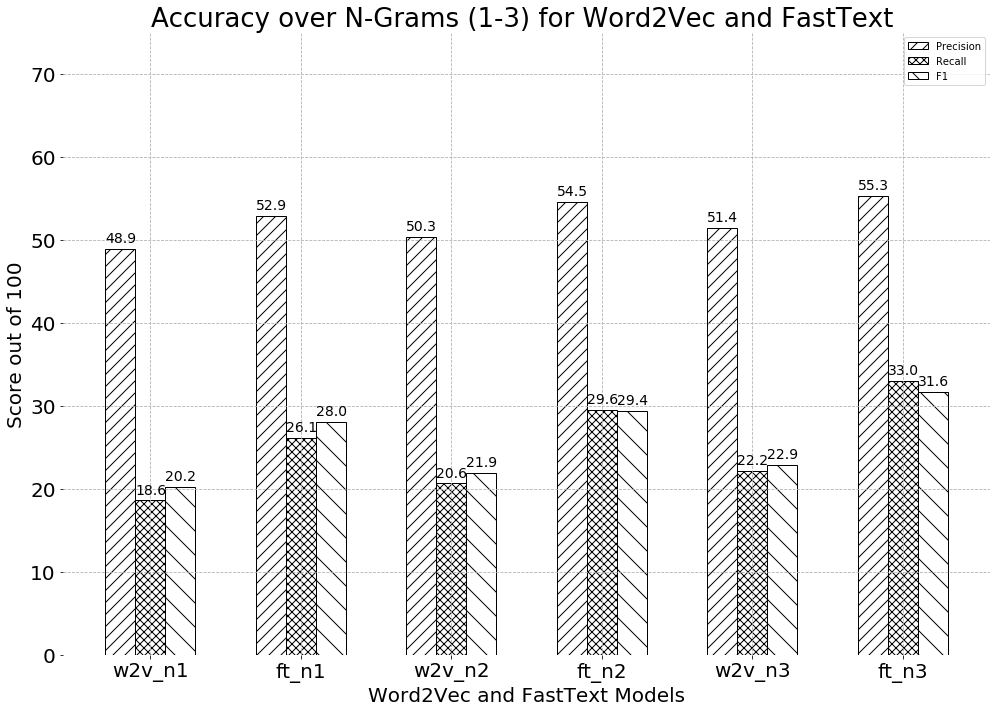

R     Kappa
0  0.429038  0.027332
3  0.428681  0.062017
1  0.436641  0.035936
4  0.446710  0.070942
2  0.432981  0.040083
5  0.433692  0.082195

In [5]:
import libs.rendering as rr
reload(rr)
plt.rcParams["figure.figsize"] = (14, 10)
#rows = ['w2v_n1', 'ft_n1', 'w2v_n2', 'ft_n2', 'w2v_n3', 'ft_n3']
rows = [0, 3, 1, 4, 2, 5]
rr.render_accuracy_scores(df_vsm_class6.iloc[rows, :],
                          title={'title':'Accuracy over N-Grams (1-3) for Word2Vec and FastText ', 'fontsize' : 26 },
                          xticks=df_vsm_class6.iloc[rows, :]['Name'],
                          axis_labels={'xlabel' : 'Word2Vec and FastText Models', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/vsm/ngrams_w2v_ft_accuracy_scores.png',
                          ylim=75)

display(df_vsm_class6.iloc[rows, :][['R','Kappa']])

### Rendering 002: Accuracy Scores for Pass/Fail

In [11]:
import libs.rendering as rr
reload(rr)
plt.rcParams["figure.figsize"] = (14, 10)
rr.render_accuracy_scores(df_class2, 
                          title={'title':'Pass/Fail Accuracy per Similarity Measure', 'fontsize' : 26 },
                          xticks=df_class6['Name'],
                          axis_labels={'xlabel' : 'Knowledge and Corpus Base Similarity Scores', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          #savefile='../renderings/vsm/ma_w2v_ft.png',
                          ylim=100)

NameError: name 'df_class2' is not defined

### Rendering 003: Accuracy Scores for Model Answers = 3

In [6]:
df_vsm_class6

Name  Accuracy  Precision    Recall        F1     Kappa  \
0             w2v_n1  0.186070   0.489222  0.186070  0.202062  0.027332   
1             w2v_n2  0.206468   0.503422  0.206468  0.219104  0.035936   
2             w2v_n3  0.221891   0.514289  0.221891  0.229111  0.040083   
3              ft_n1  0.261194   0.529352  0.261194  0.280458  0.062017   
4              ft_n2  0.295522   0.545421  0.295522  0.293896  0.070942   
5              ft_n3  0.330348   0.552875  0.330348  0.316271  0.082195   
6         w2v_n3_ma2  0.281592   0.546513  0.281592  0.291484  0.070688   
7         w2v_n3_ma3  0.329353   0.560359  0.329353  0.340098  0.106165   
8          ft_n3_ma2  0.406468   0.577410  0.406468  0.387445  0.145141   
9          ft_n3_ma3  0.441294   0.585725  0.441294  0.423806  0.177668   
10  w2v_en_n3_ma1_LP  0.121393   0.461050  0.121393  0.113923  0.015911   
11   ft_en_n3_ma1_LP  0.190547   0.525180  0.190547  0.194889  0.042758   
12           wms_ma1  0.385572   0.545208  0.385572  0.311793  0.077699   
13           cos_ma1  0.421891   0.454640  0.421891  0.406498  0.114724   

         MAE         R  
0   1.166169  0.429038  
1   0.972637  0.436641  
2   0.859204  0.432981  
3   0.671144  0.428681  
4   0.493035  0.446710  
5   0.391542  0.433692  
6   0.605970  0.474965  
7   0.480597  0.480458  
8   0.211940  0.437115  
9   0.127363  0.458297  
10  1.772139  0.161546  
11  1.423383  0.098716  
12  0.069652  0.262033  
13 -0.057711  0.275838

/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


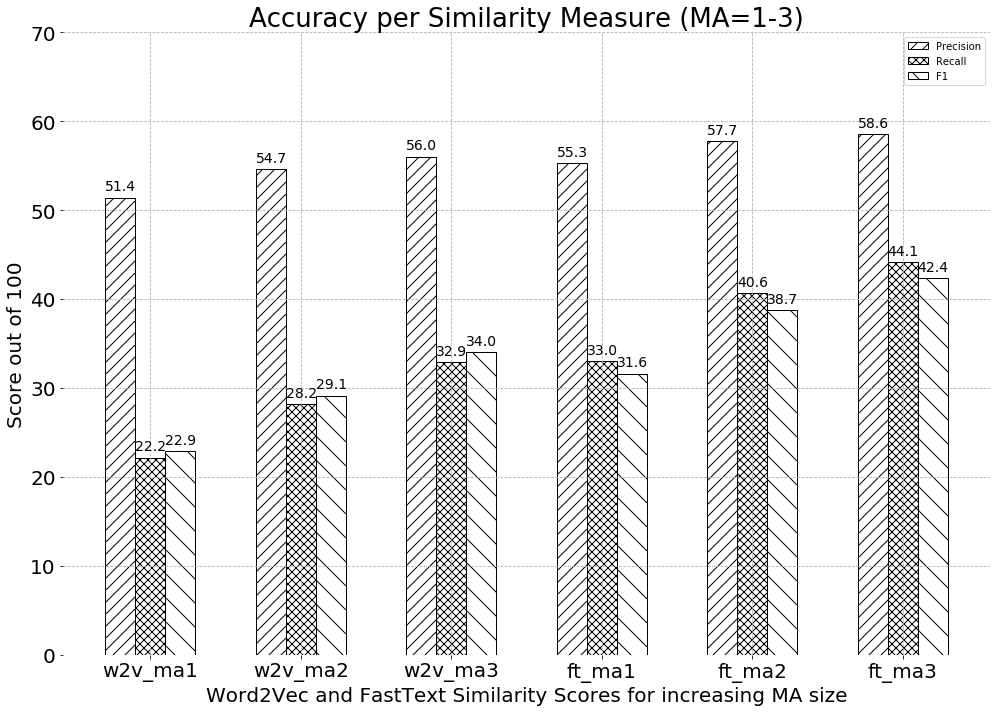

R     Kappa
2  0.432981  0.040083
6  0.474965  0.070688
7  0.480458  0.106165
5  0.433692  0.082195
8  0.437115  0.145141
9  0.458297  0.177668

In [13]:
mma_rows = [2,6,7,5,8,9]

rr.render_accuracy_scores(df_vsm_class6.iloc[mma_rows, :], 
                          title={'title':'Accuracy per Similarity Measure (MA=1-3)', 'fontsize' : 26 },
                          xticks=['w2v_ma1','w2v_ma2', 'w2v_ma3', 'ft_ma1', 'ft_ma2', 'ft_ma3'],
                          axis_labels={'xlabel' : 'Word2Vec and FastText Similarity Scores for increasing MA size', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/vsm/ma_w2v_ft.png',
                          ylim=70)

display(df_vsm_class6.iloc[mma_rows, :][['R','Kappa']])

In [22]:
fb_notes = df['Feedback_Notes'].replace(np.nan, '', regex=True)

ei_hs  = len(df[np.logical_and(fb_notes.str.contains('extra_info'), df['Score'] > 3)])
ei_num = len(df[fb_notes.str.contains('extra_info')])

print(ei_hs, ei_num, ei_hs / ei_num)

79 100 0.79


/home/che/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1363: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


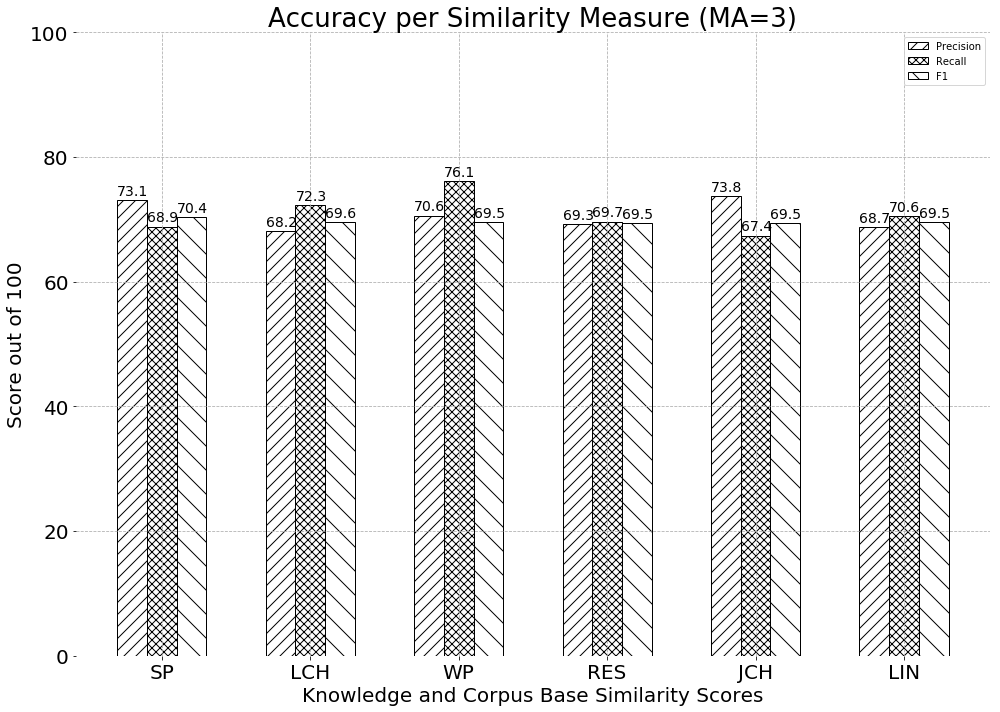

In [63]:
rr.render_accuracy_scores(df_class2_ma3, 
                          title={'title':'Accuracy per Similarity Measure (MA=3)', 'fontsize' : 26 },
                          xticks=df_class2_ma3['Name'],
                          axis_labels={'xlabel' : 'Knowledge and Corpus Base Similarity Scores', 'ylabel' : "Score out of 100", 'fontsize' : 20},
                          cols=['Precision', 'Recall', 'F1'],
                          number_info={'fontsize':14, 'xoffset': -0.1, 'yoffset' : 0.8},
                          savefile='../renderings/class2_accuracy_scores_ma3.png',
                          ylim=100)